1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV



In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
df =  dataframe[~(dataframe['clase']==1)]
df.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
print(df.groupby('clase').size())

clase
0    86
2    44
dtype: int64


## Visualizamos los datos

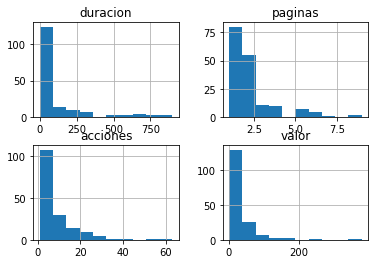

In [5]:
dataframe.drop(['clase'],1).hist() # con drop estoy borrando la columna clase pero ademas con el 1 le estoy indicando columna tb. Elimino clase pq será mi target
plt.show()

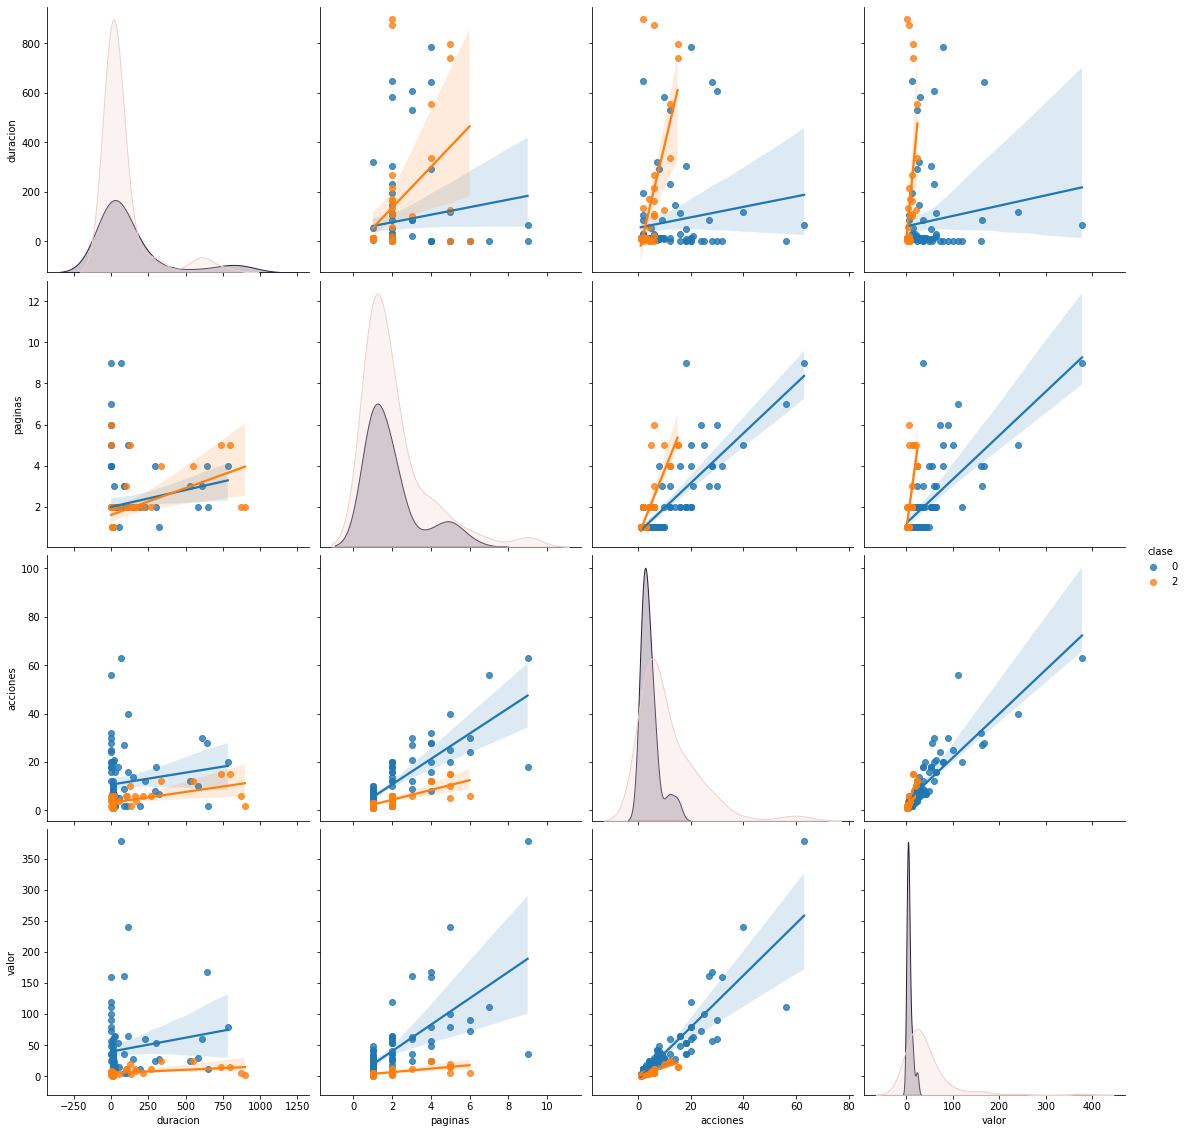

In [9]:
sns.pairplot(df.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal de nuestros datos lo obtengo con kind = 'reg'
#hue indicas que relaciona la columna clase con todas las demas a la hora de graficarlo

## Creamos el modelo

In [6]:
#elimino clase del df pq es el target
X = np.array(df.drop(['clase'], 1))
y = np.array(df['clase'])
X.shape


(130, 4)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [11]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(X_test)
print(y_pred)

[0 2 0 2 2 2 2 0 0 0 0 2 2 0 2 2 0 2 0 0 2 0 0 0 0 0]


In [17]:
print(f"El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.\nPor este motivo para este modelo:\nEl score es: {model.score(X_test, y_test)} y \nel accuracy_score es {accuracy_score(y_test, y_pred)}")

El método '.score' en los modelos de clasificación es lo mismo que la función accuracy_score.
Por este motivo para este modelo:
El score es: 1.0 y 
el accuracy_score es 1.0


In [16]:
# Muestro un df donde se vean la predicción y si acierta o no el modelo

df_pred = pd.DataFrame({"clase":y_test, "prediction": y_pred})
df_pred["acierto"] = np.where(df_pred["clase"] == df_pred["prediction"], True, False)
df_pred

,clase,prediction,acierto
0,0,0,True
1,2,2,True
2,0,0,True
3,2,2,True
4,2,2,True
5,2,2,True
6,2,2,True
7,0,0,True
8,0,0,True
9,0,0,True


In [21]:
# Matriz de confusión
con_fun = confusion_matrix(y_test, y_pred)
con_fun

array([[15,  0],
       [ 0, 11]], dtype=int64)

<AxesSubplot:>

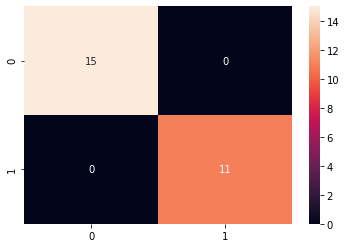

In [25]:
sns.heatmap(con_fun, annot=True)

# Adicional: Validación del Modelo

In [13]:
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [14]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.710000 (0.181384)


In [15]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.7307692307692307


## Reporte de Resultados

In [16]:
print(confusion_matrix(Y_test, predictions))

[[17  2]
 [ 5  2]]


¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

No se mejora la precisión con solo dos clases, ya que

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (toca, modifica, prueba) las variables y comenta si hay alguna de ellas que, modificándola, mejore el porcentaje de acierto del problema.

In [27]:
model_grid = linear_model.LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# parámetros cogidos de esta página
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5

linear_model.LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [28]:
clf = GridSearchCV(model_grid, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

In [29]:
best_clf = clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.4s finished


In [30]:
best_clf

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [31]:
print("tuned hyperparameters >> best parameters <<: ",best_clf.best_params_)
print("accuracy:",best_clf.best_score_)

tuned hyperparameters >> best parameters <<:  {'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy: 0.9228571428571429
